# Importing Modules:

In [1]:
import pandas as pd
import numpy as np
import Recommenders as Recommenders

# Loading Dataset:

In [2]:
song_df_1 = pd.read_csv('triplets_file.csv')
song_df_1.head()

,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [3]:
song_df_2 = pd.read_csv('song_data.csv')
song_df_2.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [4]:
# combine data
song_df = pd.merge(song_df_1, song_df_2.drop_duplicates(['song_id']), on='song_id', how='left')
song_df.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


# Data Preprocessing:

In [5]:
# creating new feature combining title and artist name
song_df['song'] = song_df['title']+' - '+song_df['artist_name']
song_df.head()

,user_id,song_id,listen_count,title,release,artist_name,year,song
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0,The Cove - Jack Johnson
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,Entre Dos Aguas - Paco De Lucia
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007,Stronger - Kanye West
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005,Constellations - Jack Johnson
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,Learn To Fly - Foo Fighters


In [6]:
# taking top 10k samples for quick results
# song_df = song_df.head(10000)

In [7]:
# cummulative sum of listen count of the songs
song_grouped = song_df.groupby(['song']).agg({'listen_count':'count'}).reset_index()
song_grouped.head()

,song,listen_count
0,#!*@ You Tonight [Featuring R. Kelly] (Explici...,78
1,#40 - DAVE MATTHEWS BAND,338
2,& Down - Boys Noize,373
3,' Cello Song - Nick Drake,103
4,'97 Bonnie & Clyde - Eminem,93


In [8]:
song_grouped_sorted = song_grouped.sort_values(by='listen_count', ascending=False)
song_grouped_sorted.head(10)

,song,listen_count
7127,Sehr kosmisch - Harmonia,8277
9084,Undo - Björk,7032
2068,Dog Days Are Over (Radio Edit) - Florence + Th...,6949
9880,You're The One - Dwight Yoakam,6412
6774,Revelry - Kings Of Leon,6145
7115,Secrets - OneRepublic,5841
3613,Horn Concerto No. 4 in E flat K495: II. Romanc...,5385
2717,Fireflies - Charttraxx Karaoke,4795
3485,Hey_ Soul Sister - Train,4758
8847,Tive Sim - Cartola,4548


In [9]:
grouped_sum = song_grouped['listen_count'].sum()
song_grouped['percentage'] = (song_grouped['listen_count'] / grouped_sum ) * 100
song_grouped.sort_values(['listen_count', 'song'], ascending=[0,1])

,song,listen_count,percentage
7127,Sehr kosmisch - Harmonia,8277,0.41385
9084,Undo - Björk,7032,0.35160
2068,Dog Days Are Over (Radio Edit) - Florence + Th...,6949,0.34745
9880,You're The One - Dwight Yoakam,6412,0.32060
6774,Revelry - Kings Of Leon,6145,0.30725
...,...,...,...
3526,Historia Del Portero - Ricardo Arjona,51,0.00255
7071,Scared - Three Days Grace,51,0.00255
2147,Don´t Leave Me Now - Amparanoia,50,0.00250
2991,Ghosts (Toxic Avenger Mix) - Ladytron,48,0.00240


# Popularity Based Recommendation:

In [10]:
pr = Recommenders.popularity_recommender_py()
pr.create(song_df, 'user_id', 'song')
# display the top 10 popular songs
pr.recommend(song_df['user_id'][5])
pr.recommend(song_df['user_id'][100])

,user_id,song,score,Rank
7127,e006b1a48f466bf59feefed32bec6494495a4436,Sehr kosmisch - Harmonia,8277,1.0
9084,e006b1a48f466bf59feefed32bec6494495a4436,Undo - Björk,7032,2.0
2068,e006b1a48f466bf59feefed32bec6494495a4436,Dog Days Are Over (Radio Edit) - Florence + Th...,6949,3.0
9880,e006b1a48f466bf59feefed32bec6494495a4436,You're The One - Dwight Yoakam,6412,4.0
6774,e006b1a48f466bf59feefed32bec6494495a4436,Revelry - Kings Of Leon,6145,5.0
7115,e006b1a48f466bf59feefed32bec6494495a4436,Secrets - OneRepublic,5841,6.0
3613,e006b1a48f466bf59feefed32bec6494495a4436,Horn Concerto No. 4 in E flat K495: II. Romanc...,5385,7.0
2717,e006b1a48f466bf59feefed32bec6494495a4436,Fireflies - Charttraxx Karaoke,4795,8.0
3485,e006b1a48f466bf59feefed32bec6494495a4436,Hey_ Soul Sister - Train,4758,9.0
8847,e006b1a48f466bf59feefed32bec6494495a4436,Tive Sim - Cartola,4548,10.0


# Item Similarity Recommendation:

In [11]:
# take the top 20k songs
song_df_20k = song_df.head(20000)

ir = Recommenders.item_similarity_recommender_py()
ir.create(song_df_20k, 'user_id', 'song')
user_items = ir.get_user_items(song_df_20k['user_id'][5])
# display user songs history
for user_item in user_items:
    print(user_item)
    
    

# give song recommendation for that user
ir.recommend(song_df_20k['user_id'][5])
# give related songs based on the words
ir.get_similar_items(['Oliver James - Fleet Foxes', 'The End - Pearl Jam'])

The Cove - Jack Johnson
Entre Dos Aguas - Paco De Lucia
Stronger - Kanye West
Constellations - Jack Johnson
Learn To Fly - Foo Fighters
Apuesta Por El Rock 'N' Roll - Héroes del Silencio
Paper Gangsta - Lady GaGa
Stacked Actors - Foo Fighters
Sehr kosmisch - Harmonia
Heaven's gonna burn your eyes - Thievery Corporation feat. Emiliana Torrini
Let It Be Sung - Jack Johnson / Matt Costa / Zach Gill / Dan Lebowitz / Steve Adams
I'll Be Missing You (Featuring Faith Evans & 112)(Album Version) - Puff Daddy
Love Shack - The B-52's
Clarity - John Mayer
I?'m A Steady Rollin? Man - Robert Johnson
The Old Saloon - The Lonely Island
Behind The Sea [Live In Chicago] - Panic At The Disco
Champion - Kanye West
Breakout - Foo Fighters
Ragged Wood - Fleet Foxes
Mykonos - Fleet Foxes
Country Road - Jack Johnson / Paula Fuga
Oh No - Andrew Bird
Love Song For No One - John Mayer
Jewels And Gold - Angus & Julia Stone
Warning - Incubus
83 - John Mayer
Neon - John Mayer
The Middle - Jimmy Eat World
High and 

,user_id,song,score,rank
0,,Quiet Houses - Fleet Foxes,0.500000,1
1,,Your Protector - Fleet Foxes,0.500000,2
2,,Tiger Mountain Peasant Song - Fleet Foxes,0.500000,3
3,,Sun It Rises - Fleet Foxes,0.500000,4
4,,He Doesn't Know Why - Fleet Foxes,0.450000,5
5,,Meadowlarks - Fleet Foxes,0.416667,6
6,,Heard Them Stirring - Fleet Foxes,0.416667,7
7,,St. Elsewhere - Dave Grusin,0.375000,8
8,,White Winter Hymnal - Fleet Foxes,0.330357,9
9,,Oil And Water - Incubus,0.266667,10


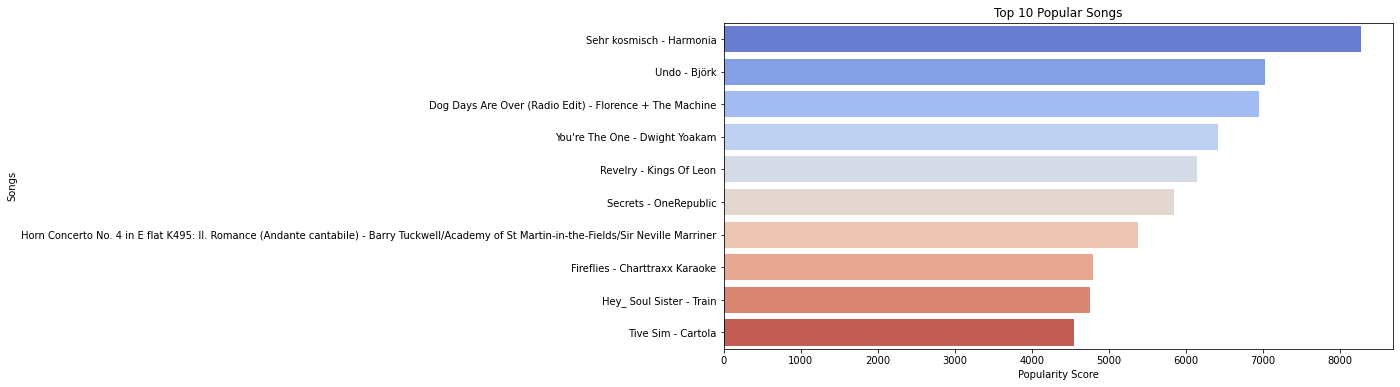

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

popular_songs = pr.recommend(song_df['user_id'][5])

plt.figure(figsize=(12, 6))
sns.barplot(x='score', y='song', data=popular_songs, palette='coolwarm')
plt.title('Top 10 Popular Songs')
plt.xlabel('Popularity Score')
plt.ylabel('Songs')
plt.show()


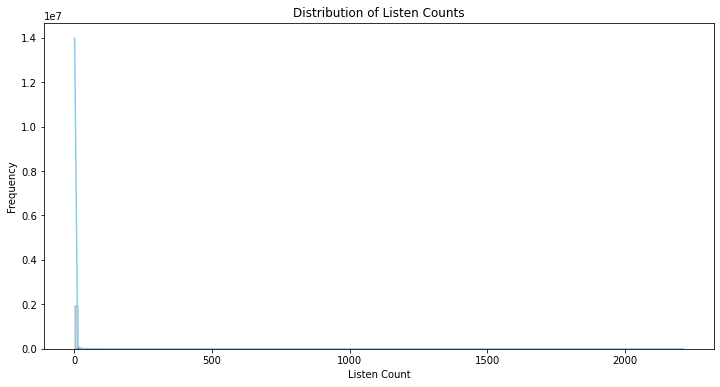

In [13]:
plt.figure(figsize=(12, 6))
sns.histplot(song_df['listen_count'], bins=200, color='skyblue', kde=True)
plt.title('Distribution of Listen Counts')
plt.xlabel('Listen Count')
plt.ylabel('Frequency')
plt.show()


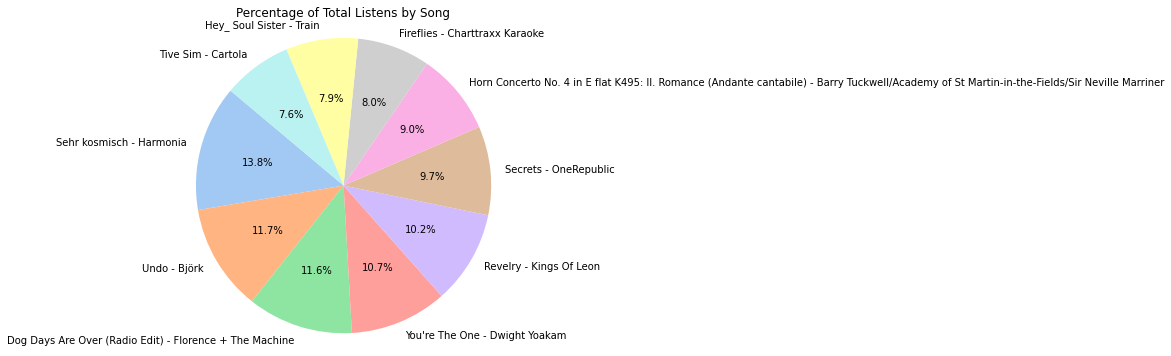

In [14]:
top_songs = song_grouped.sort_values('percentage', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.pie(top_songs['percentage'], labels=top_songs['song'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.axis('equal') 
plt.title('Percentage of Total Listens by Song')
plt.show()
